### PBMC scQuint Differential Splicing

In [ ]:
##Differential intron splicing analysis using scQuint. Scripts by Gonzalo Benegas and Derek Bogdanoff

In [1]:
!date

Wed Dec 28 19:07:28 PST 2022


In [212]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint


In [3]:
#analysis approach from:
#https://github.com/songlab-cal/scquint/blob/main/differential_splicing_example.ipynb

In [4]:
import anndata

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from scquint.differential_splicing import run_differential_splicing
from scquint.data import calculate_PSI

In [6]:
from scquint.data import calculate_PSI
from scquint.differential_splicing import run_differential_splicing, run_differential_splicing_for_each_group, find_marker_introns, mask_PSI
from scquint.dimensionality_reduction.pca import run_pca

In [7]:
input_dir = output_dir= '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [8]:
adata_spl = sc.read_h5ad(input_dir+'spl_3prime_splice_acceptor.h5ad')

In [84]:
groupby = "ct1"
adata_spl.obs[groupby].value_counts()

cM        6218
T4        5339
T8        3186
B         2007
NK        1654
ncM       1162
Tgd        527
cDC        258
PB         186
Progen      91
pDC         45
Name: ct1, dtype: int64

In [47]:
groups_test = adata_spl.obs[groupby].value_counts()[:14].index.values.astype(str).tolist()[:9]

In [48]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [50]:
%%time


diff_spl_intron_groups, diff_spl_introns = run_differential_splicing_for_each_group(
    adata_spl, 
    groupby, 
    groups=groups_test,
    subset_to_groups=True,
    min_cells_per_intron_group=50, 
    min_total_cells_per_intron=50, 
    n_jobs=-1,
)

cM
sample sizes:  6218 14319
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 3165)
Number of intron groups:  1485
Number of introns:  3165



100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1485/1485 [01:48<00:00, 13.73it/s]


T4
sample sizes:  5339 15198
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 3090)
Number of intron groups:  1447
Number of introns:  3090



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1447/1447 [00:12<00:00, 120.38it/s]


T8
sample sizes:  3186 17351
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 2686)
Number of intron groups:  1248
Number of introns:  2686



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1248/1248 [00:09<00:00, 125.90it/s]


B
sample sizes:  2007 18530
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 2035)
Number of intron groups:  937
Number of introns:  2035



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 937/937 [00:08<00:00, 111.49it/s]


NK
sample sizes:  1654 18883
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 2029)
Number of intron groups:  932
Number of introns:  2029



100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 932/932 [00:08<00:00, 107.22it/s]


ncM
sample sizes:  1162 19375
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 2377)
Number of intron groups:  1100
Number of introns:  2377



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1100/1100 [00:09<00:00, 110.40it/s]


Tgd
sample sizes:  527 20010
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 984)
Number of intron groups:  441
Number of introns:  984



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 441/441 [00:06<00:00, 67.74it/s]


cDC
sample sizes:  258 20279
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 1261)
Number of intron groups:  571
Number of introns:  1261



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 571/571 [00:06<00:00, 84.80it/s]


PB
sample sizes:  186 20351
(20537, 3282)
filter_min_cells_per_feature
filter_singletons
(20537, 3282)
filter_min_global_proportion
filter_singletons
(20537, 3272)
filter_min_cells_per_intron_group
filter_singletons
filter_min_cells_per_intron_group
filter_singletons
(20537, 1270)
Number of intron groups:  579
Number of introns:  1270



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 579/579 [00:06<00:00, 83.06it/s]


CPU times: user 1min 11s, sys: 16.1 s, total: 1min 27s
Wall time: 4min 25s


In [54]:
diff_spl_intron_groups.head()

,p_value,ll_null,ll,n_classes,gene_id,gene_name,max_abs_delta_psi,max_abs_lfc_psi,ranking,p_value_adj,test_group,name
0,8.055039e-161,-2620.0820412857074,-2251.4521391931694,3,ENSG00000188186,LAMTOR4,0.203682,3.598097,0,1.196173e-157,cM,LAMTOR4_chr7_100149498_+
1,9.358735e-132,-6176.943586516893,-5878.661718050128,2,ENSG00000149925,ALDOA,0.175766,1.242810,1,6.948861e-129,cM,ALDOA_chr16_30067233_+
2,3.847928e-102,-3000.976620007134,-2767.460475381592,3,ENSG00000112514,CUTA,0.431212,2.049001,2,1.904724e-99,cM,CUTA_chr6_33417696_-
3,4.089695e-97,-17218.919347335504,-17000.245492921127,2,ENSG00000138326,RPS24,0.122599,0.359028,3,1.518299e-94,cM,RPS24_chr10_78040614_+
4,2.925762e-93,-959.6065591022636,-749.787556957623,2,ENSG00000082074,FYB1,0.522618,2.369157,4,8.689513e-91,cM,FYB1_chr5_39124279_-


In [55]:
sig_diff_spl_intron_groups = diff_spl_intron_groups.query('p_value_adj < 0.05 and max_abs_delta_psi > 0.05')

sig_diff_spl_intron_groups.shape

(921, 12)

In [56]:
sig_diff_spl_intron_groups.gene_name.nunique()

423

In [59]:
diff_spl_introns[diff_spl_introns.intron_group.isin(sig_diff_spl_intron_groups.name)].shape

(5893, 22)

Text(0.5, 1.0, 'cell counts per celltype')

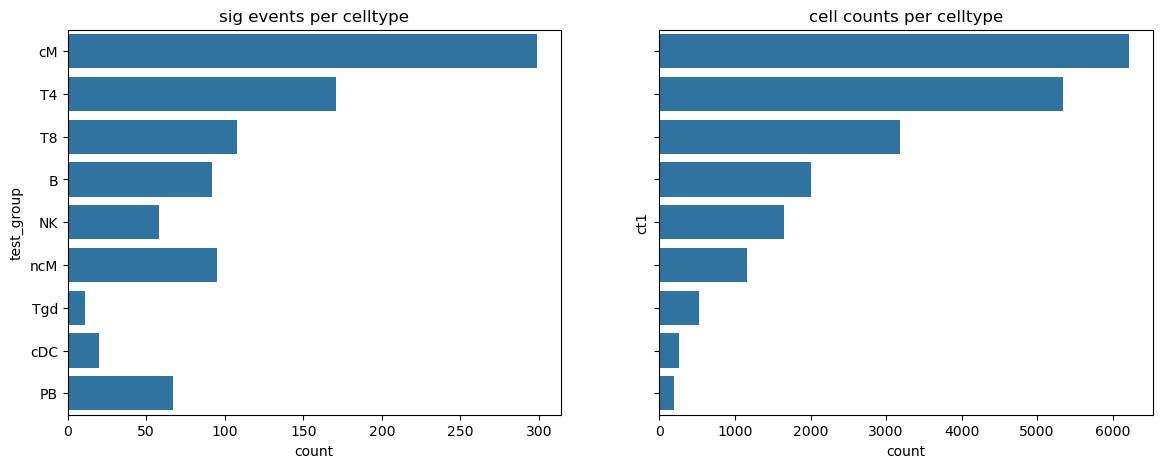

In [208]:
# Number of significant events per cell type
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)


sns.countplot(sig_diff_spl_intron_groups, y="test_group", color="C0", order=groups_test, ax=axes[0])
axes[0].set_title('sig events per celltype')

sns.countplot(adata_spl.obs, y='ct1', color="C0", order=groups_test, ax=axes[1])
axes[1].set_title('cell counts per celltype')

In [61]:
adata_spl.layers["PSI_raw"] = calculate_PSI(adata_spl)


/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scquint/data.py:203: RuntimeWarning: invalid value encountered in divide
  return X / intron_group_sums[:,groups]


In [62]:
adata_spl

AnnData object with n_obs × n_vars = 20673 × 3282
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'chromosome', 'start', 'end', 'st

In [63]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [64]:
marker_introns = find_marker_introns(
    sig_diff_spl_intron_groups, diff_spl_introns, 10, min_delta_psi=0.3,
)
marker_introns = {c: marker_introns[c] for c in groups_test} # just reordering
marker_introns

{'cM': ['AKAP13_chr15:85544144-85575130',
  'SH3KBP1_chrX:19746442-19836124',
  'TSPAN4_chr11:844187-847200',
  'PEPD_chr19:33391480-33395109',
  'ARFIP1_chr4:152870849-152872451',
  'LYAR_chr4:4268616-4273582',
  'FOXP1_chr3:71299881-71359149',
  'CCND3_chr6:41940586-41941451',
  'CMC1_chr3:28263381-28316332',
  'NCOA4_chr10:46016695-46023329'],
 'T4': ['LIMS1_chr2:108621462-108659604',
  'DOCK8_chr9:273101-286460',
  'RNH1_chr11:502250-507112',
  'CYLD_chr16:50742217-50742761',
  'FAM200B_chr4:15681785-15686235',
  'SET_chr9:128689656-128691169',
  'PCGF5_chr10:91163082-91222688',
  'RASSF1_chr3:50332155-50337172',
  'DGKA_chr12:55931345-55936422',
  'ARID5B_chr10:62049484-62050887'],
 'T8': ['FGR_chr1:27625152-27626459', 'POLD4_chr11:67353078-67353538'],
 'B': ['PTPRC_chr1:198696910-198699563',
  'TANK_chr2:161137064-161179613',
  'ITGAE_chr17:3720403-3723287'],
 'NK': ['FYB1_chr5:39202988-39270568',
  'MGAT4A_chr2:98663180-98663340',
  'AC092821.3_chr12:9645394-9653682'],
 'ncM': [

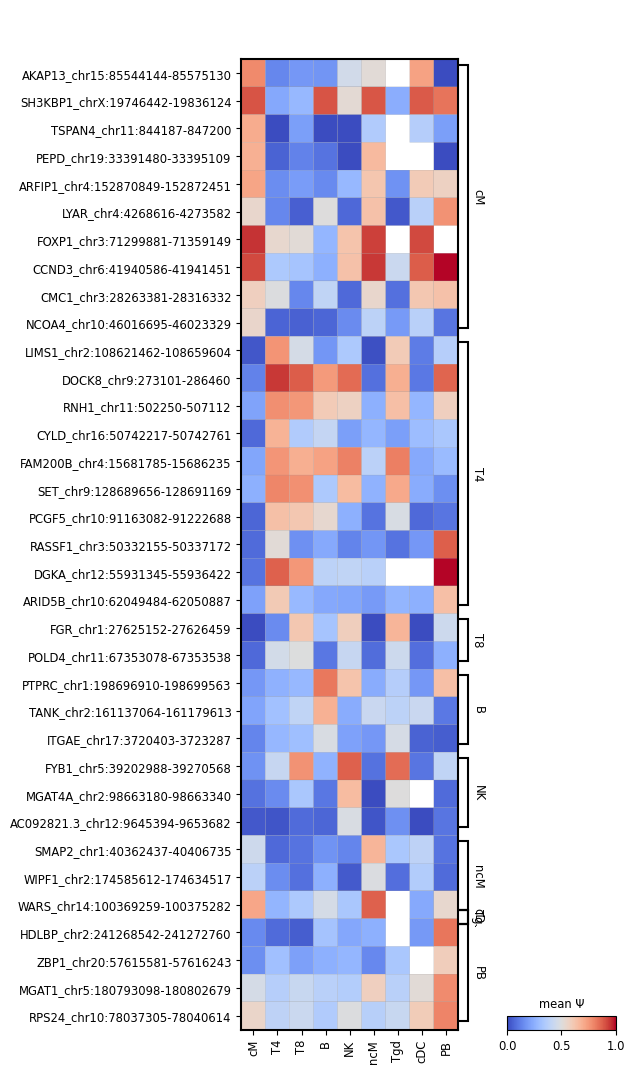

In [65]:
sc.pl.matrixplot(
    mask_PSI(adata_spl[adata_spl.obs[groupby].isin(groups_test)], 
             marker_introns, 
             groupby, min_cells=5),
    marker_introns,
    groupby, 
    cmap='coolwarm',
    categories_order=groups_test,
    swap_axes=True,
    layer="PSI_raw_masked", 
    colorbar_title="mean Ψ",
    vmin=0, vmax=1,
    dendrogram=False,
)


In [66]:
sum(find_marker_introns(diff_spl_intron_groups, diff_spl_introns, 3, min_delta_psi=0.5).values(), [])

['HDLBP_chr2:241268542-241272760',
 'FYB1_chr5:39202988-39270568',
 'LIMS1_chr2:108621462-108659604',
 'DOCK8_chr9:273101-286460',
 'FGR_chr1:27625152-27626459',
 'PTPRC_chr1:198696910-198699563',
 'AKAP13_chr15:85544144-85575130',
 'SH3KBP1_chrX:19746442-19836124']

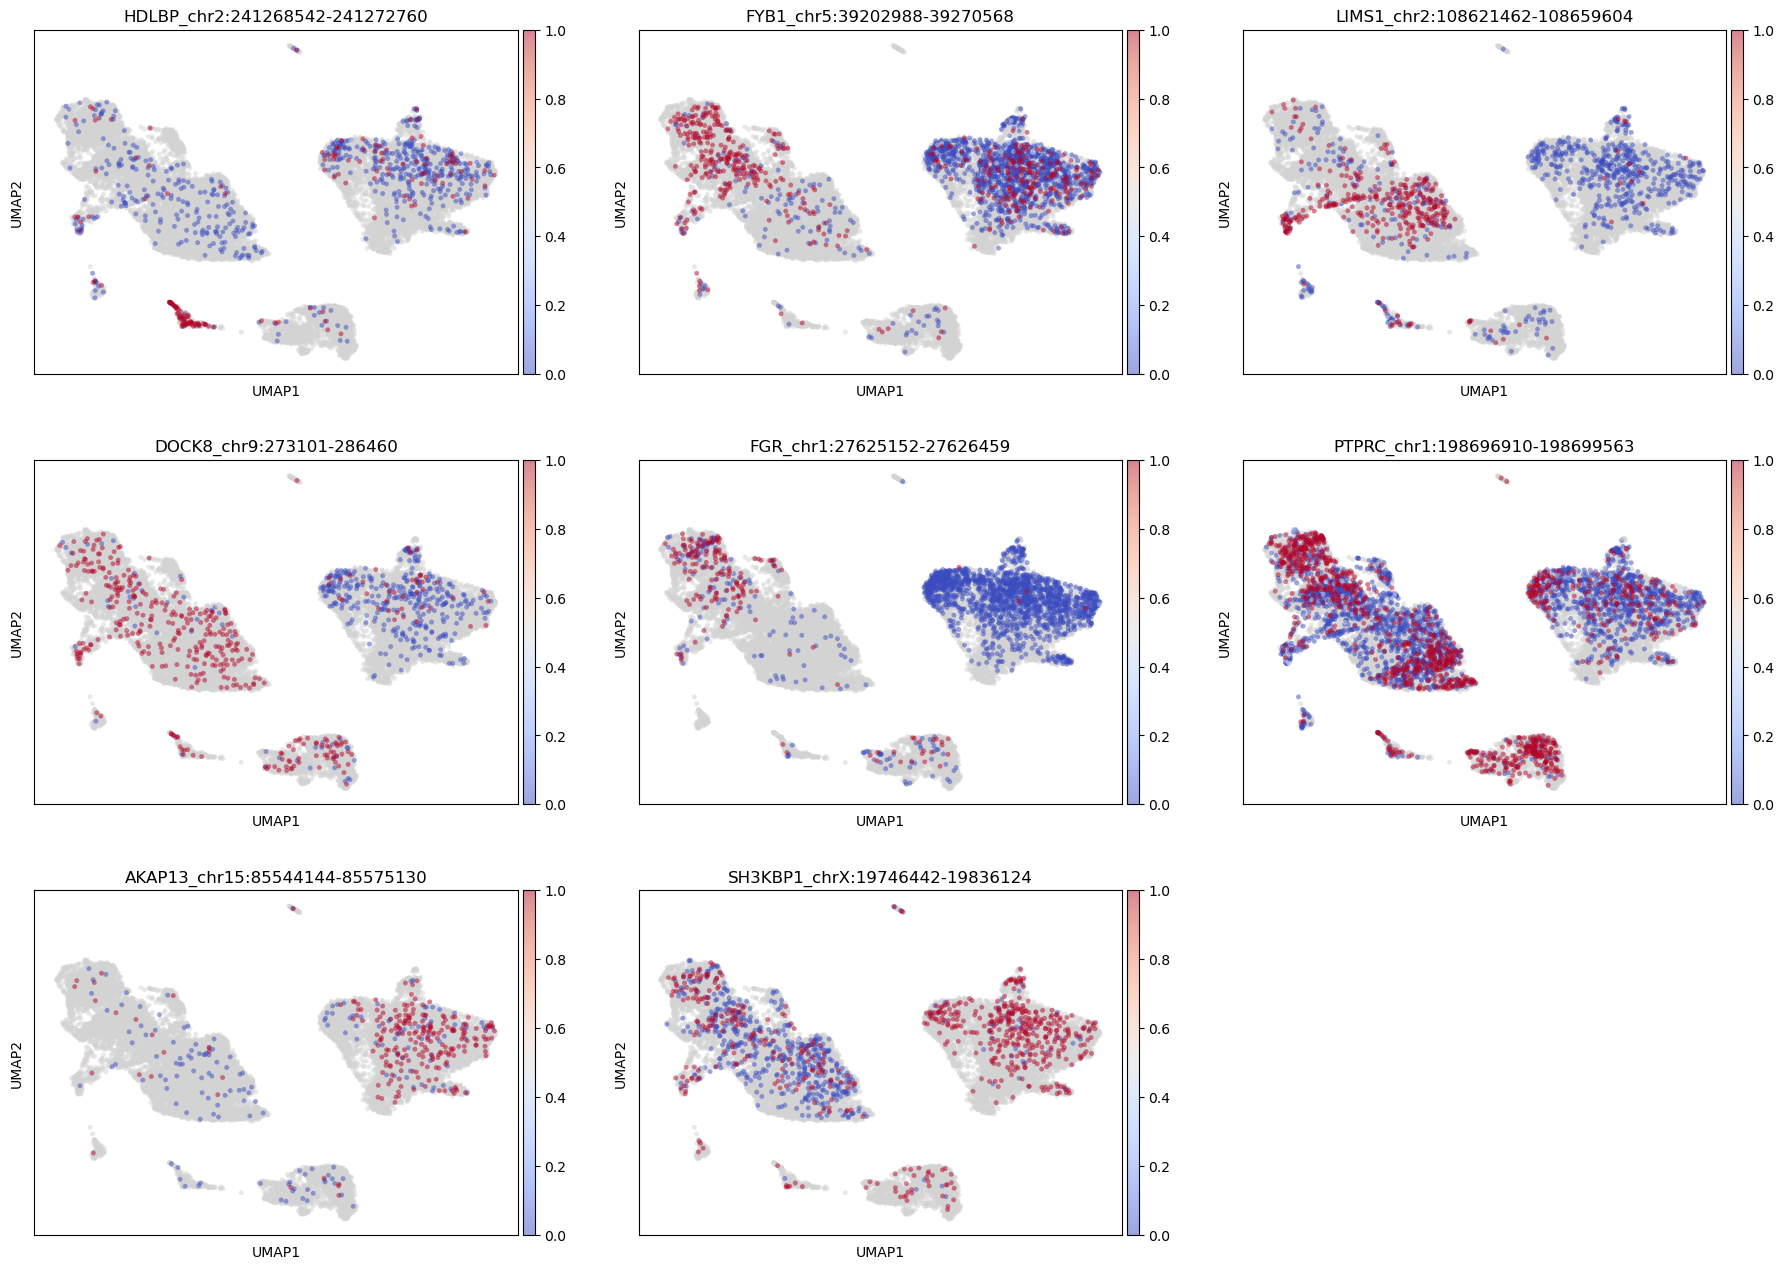

In [80]:
sc.pl.umap(
    adata_spl,
    color=sum(find_marker_introns(diff_spl_intron_groups, diff_spl_introns, 3, min_delta_psi=0.5).values(), []), 
    cmap='coolwarm',
    layer="PSI_raw", vmin=0, vmax=1, ncols=3, size=50, alpha=0.5,
)


In [69]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [70]:
temp = diff_spl_introns[diff_spl_introns.intron_group.isin(sig_diff_spl_intron_groups.name)]

In [163]:
genedf = sc.get.obs_df(
        adata_spl[adata_spl.obs['ct1'].isin(groups_test)],
        layer = 'PSI_raw',
        keys=["ct1", *temp[temp['delta_psi'] > .20]['name'].tolist()]
    )
grouped = genedf.groupby("ct1")
mean, var = grouped.mean(), grouped.var()

In [164]:
mean.shape

(9, 214)

In [165]:
##remove offending gene
mean = mean.loc[:, ~mean.columns.str.startswith('AC092821.3')]

In [174]:
mean.shape

(9, 213)

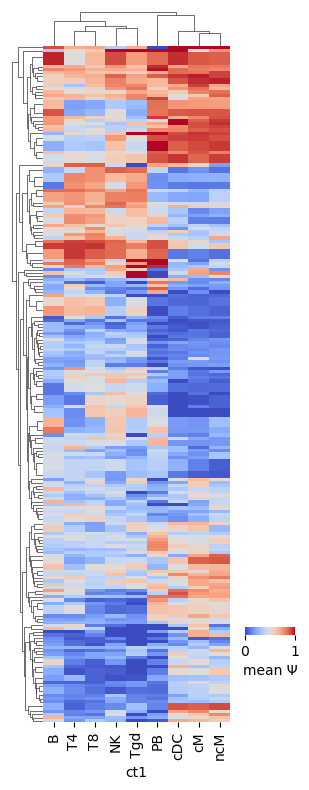

In [187]:
h = sns.clustermap(mean.fillna(0).T,
               cmap="coolwarm",
               figsize=(2.5,8),
               yticklabels=False,
               metric='euclidean',
          #     mask=(np.isinf(mean) |  np.isnan(mean))
               dendrogram_ratio=(.15,.05),
               cbar_pos=(1, .2, .2, .01),
               cbar_kws={'orientation':'horizontal','label':'mean Ψ'}

              )



In [168]:
mean

,LMO4_chr1:87329245-87332012,RABGAP1L_chr1:174877606-174957456,WDR37_chr10:1056880-1072115,ABI1_chr10:26770346-26771074,ZNF487_chr10:43437263-43454064,NCOA4_chr10:46016695-46023329,ARID5B_chr10:62000322-62050887,PCGF5_chr10:91220837-91222688,SIGIRR_chr11:406539-407061,RNH1_chr11:502250-504426,...,VPS29_chr12:110496204-110499534,RNF149_chr2:101295182-101307840,METTL5_chr2:169824641-169824781,ORMDL1_chr2:189782603-189783013,HDLBP_chr2:241268542-241272760,ZBP1_chr20:57615581-57616243,MRPL22_chr5:154950939-154956370,MGAT1_chr5:180793098-180802679,DECR1_chr8:90017327-90018908,SET_chr9:128684008-128691169
ct1,,,,,,,,,,,,,,,,,,,,,
B,0.750000,0.235294,0.200000,0.196970,0.461538,0.058824,0.631148,0.463415,0.173913,0.200000,...,0.376106,0.436364,0.337662,0.495652,0.320000,0.250000,0.681818,0.375000,0.798701,0.657718
NK,0.326087,0.107143,0.181818,0.136364,0.083333,0.152174,0.537037,0.746269,0.043478,0.214286,...,0.451724,0.307692,0.421053,0.461957,0.225806,0.272727,0.759259,0.360000,0.706522,0.346154
PB,0.714286,0.666667,0.000000,0.071429,0.000000,0.095238,0.267857,0.906250,0.000000,0.240741,...,0.744658,0.435642,0.619883,0.678205,0.829012,0.589552,0.964461,0.784314,0.985507,0.840852
T4,0.490196,0.343434,0.400000,0.142405,0.552632,0.057263,0.303030,0.360097,0.070588,0.085586,...,0.488423,0.289801,0.433689,0.485004,0.074074,0.307692,0.705263,0.369565,0.754391,0.205492
T8,0.500000,0.176471,0.461538,0.108434,0.111111,0.049296,0.521186,0.386628,0.044444,0.022222,...,0.429435,0.217391,0.473333,0.418660,0.040541,0.203390,0.608108,0.423077,0.693103,0.228205
Tgd,0.636364,0.000000,0.545455,0.181818,0.000000,0.187500,0.600000,0.521739,0.000000,0.000000,...,0.472973,0.153846,0.250000,0.339286,0.000000,0.333333,0.631579,0.375000,0.687500,0.290323
cDC,1.000000,0.500000,0.500000,0.368421,0.333333,0.377451,0.500000,0.931034,0.178571,0.142857,...,0.518750,0.295455,0.362069,0.500000,0.185185,0.666667,0.719298,0.517857,0.857143,0.760563
cM,0.905941,0.555556,0.654545,0.390071,0.629630,0.550459,0.662281,0.938202,0.301688,0.356935,...,0.462191,0.196316,0.388710,0.487288,0.145763,0.156250,0.832512,0.467181,0.814879,0.748745
ncM,0.958333,0.500000,0.538462,0.534884,0.090909,0.387255,0.675676,0.909574,0.134921,0.218254,...,0.582721,0.155271,0.360215,0.536008,0.250000,0.142857,0.822034,0.580000,0.793372,0.741379


### plot gene expression for relevant genes

In [148]:
adata_exp = anndata.read_h5ad("/c4/home/derek/data1/derek/data_scSLR/PBMC/gene_expression.h5ad")
adata_exp

AnnData object with n_obs × n_vars = 20673 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'feature_types', 'genome', 'gene

In [171]:
genedf_genes = sc.get.obs_df(
        adata_exp[adata_exp.obs['ct1'].isin(groups_test)],
      #  layer = 'PSI_raw',
        keys=[x for x in ["ct1", *temp[temp['delta_psi'] > .20]['gene_name'].tolist()] if x != 'AC092821.3']
    )
grouped_genes = genedf_genes.groupby("ct1")
mean_genes, var_genes = grouped_genes.mean(), grouped_genes.var()

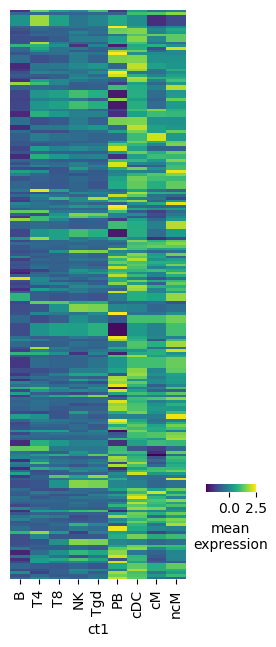

In [190]:
c = sns.clustermap(mean_genes.fillna(0).T,
               cmap="viridis",
               figsize=(2.5,8),
               yticklabels=False,
          #     metric='euclidean',
          #     mask=(np.isinf(mean) |  np.isnan(mean))
          #     dendrogram_ratio=(0,0),
               row_linkage=h.dendrogram_row.linkage,
               col_linkage=h.dendrogram_col.linkage,
               cbar_pos=(1.02, .2, .2, .01),
               cbar_kws={'orientation':'horizontal','label':'mean\nexpression'},
               z_score=0,
            #   standard_scale=1,
                   # vmax=1,
                   # vmin=-1
              )

c.ax_row_dendrogram.set_visible(False)
c.ax_col_dendrogram.set_visible(False)

### sashimi tracks

In [230]:
import os
from pybiomart import Dataset
from pygenometracks import tracks
from IPython.display import Image

In [216]:
os.makedirs('./sashimi_plots', exist_ok=True)

In [217]:
sashimi_introns = diff_spl_introns[diff_spl_introns['gene_name'] == "PTPRC"]

In [218]:
sashimi_introns.head()

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,...,intron_group_size,n_genes_per_intron_group,psi_a,psi_b,delta_psi,lfc_psi,abs_delta_psi,abs_lfc_psi,test_group,name
306,chr1,198692374,198699563,+,1,2666,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.819360,0.642666,0.176694,0.350428,0.176694,0.350428,cM,PTPRC_chr1:198692374-198699563
307,chr1,198696910,198699563,+,1,1349,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,2,1,0.180640,0.357334,-0.176694,-0.984158,0.176694,0.984158,cM,PTPRC_chr1:198696910-198699563
308,chr1,198692374,198703297,+,1,1654,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.315574,0.272767,0.042806,0.210307,0.042806,0.210307,cM,PTPRC_chr1:198692374-198703297
309,chr1,198699705,198703297,+,1,2648,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.506657,0.445208,0.061449,0.186531,0.061449,0.186531,cM,PTPRC_chr1:198699705-198703297
310,chr1,198702531,198703297,+,1,1565,ENSG00000081237,ENSG00000081237,1,ENSG00000081237,...,3,1,0.177769,0.282025,-0.104256,-0.665818,0.104256,0.665818,cM,PTPRC_chr1:198702531-198703297


In [219]:
groups_test

['cM', 'T4', 'T8', 'B', 'NK', 'ncM', 'Tgd', 'cDC', 'PB']

In [220]:
link_files=[]

for name in groups_test:
    if name in sashimi_introns.test_group.unique():
        
        link_files.append(name)
        
        sashimi_introns_ = sashimi_introns[sashimi_introns.test_group == name]
        
        number_introns = sashimi_introns_.iloc[[0]].intron_group_size.values[0]
        
        f = open(f"./sashimi_plots/link_{name}.txt", "w")
        
        for intron in range(number_introns):
            f.write(str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['start'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['chromosome'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['end'].values[0])+'\t'
                    +str(sashimi_introns_.iloc[[intron]]['psi_a'].values[0])+'\n'
                   )

/c4/home/derek/miniconda3/envs/scquint/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


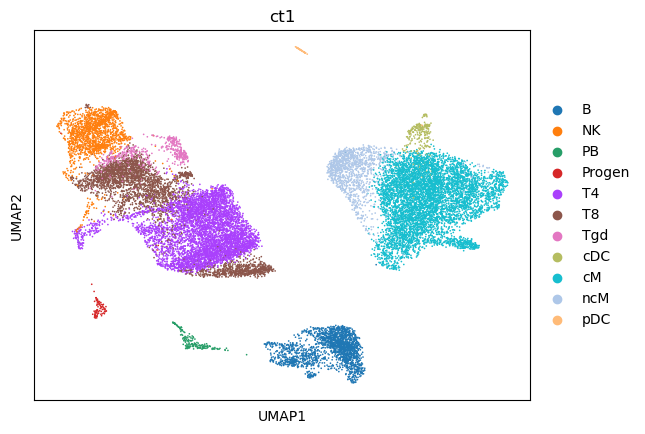

In [222]:
sc.pl.umap(adata_spl,
           color='ct1'
          )

In [223]:
colors = pd.DataFrame(adata_spl.uns['ct1_colors'],
             index=adata_spl.obs['ct1'].cat.categories,
             columns=['color']
        
            )

In [224]:
link_files[1:-2]

['T4', 'T8', 'B', 'NK', 'ncM', 'Tgd']

In [226]:
##write ini file

ini_file = """
[spacer]
height = 0.1
"""

bw_path = '/c4/home/derek/data1/derek/data_scSLR/PBMC/concat_BAMS/'

for name in link_files[1:-2]:

    ini_file = ini_file + f"""

[sashimi file test]
title = {name}
link_file = ./sashimi_plots/link_{name}.txt
# Path to bigwig file
bw_file = {bw_path}/{name}.bw
# Path to links file
height = 10
bw_color = {colors.loc[name]['color']}
number_of_bins = 1000
# max_value = 12
nans_to_zeros = true
summary_method = mean
show_data_range = true
link_color ={colors.loc[name]['color']}
#line_style =
fontsize = 10
# operation = log(bw_file + 1)
# The link in Sashimi plot is a Bezier curve.
# The height of the curve is calculated from the length of the intron.
# When the y-axis in bigwig track is different, the height of curve needs to be scaled.
scale_link_height = 2
# The line width for links is proportion to the numbers at the last column in links file (PSI).
# But the absolute width is calculated from the supplied numbers, which can look too thin or too wide sometimes.
# Use scale_line_width to scale the absolute line widths.
# You may need to try several values to get a satisfying result.
scale_link_height = 3
scale_line_width = 3
show_number = true
file_type = sashimiBigWig


"""

ini_file = ini_file + """
[spacer]
height = 1

[genes]
color = black  
file = /c4/home/derek/data1/HDD-2/derek/reference/refdata-gex-GRCh38-2020-A/genes/genes.gtf
height = 7
# title = gtf
# fontsize = 10
file_type = gtf
gene_rows = 10

"""
    
print(ini_file, file=open('./sashimi_plots/sashimi.ini','w'))


    


In [227]:
from pybiomart import Dataset

dataset = Dataset(name='hsapiens_gene_ensembl',
                  host='http://www.ensembl.org')

genes = dataset.query(attributes=['external_gene_name','chromosome_name','start_position','end_position'],
              )

In [228]:
genes[genes['Gene name'] == 'PTPRC']

,Gene name,Chromosome/scaffold name,Gene start (bp),Gene end (bp)
1900,PTPRC,CHR_HSCHR1_3_CTG31,198650158,198733963
68345,PTPRC,1,198638457,198757476


In [1]:
!pyGenomeTracks --tracks ./sashimi_plots/sashimi.ini --region 'chr1:198638457-198757476' -o ./sashimi_plots/sashimi_PTPRC.png


INFO:pygenometracks.tracksClass:initialize 1. [spacer]
INFO:pygenometracks.tracksClass:initialize 2. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 3152.43it/s]
INFO:pygenometracks.tracksClass:initialize 3. [sashimi file test]
100%|███████████████████████████████████████████| 2/2 [00:00<00:00, 4452.55it/s]
INFO:pygenometracks.tracksClass:initialize 4. [spacer]
INFO:pygenometracks.tracksClass:initialize 5. [genes]
100%|██████████████████████████████████████████| 26/26 [00:00<00:00, 604.59it/s]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:7.145663022994995
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 29.893617021276597. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [spacer]
INFO:pygenometracks.tracksClass:plotting 2. [sashimi file test]
DEBUG:pygenometracks.tracks.GenomeTrack:2 links plotted
INFO:pygenometracks.tracksClass:plotting 3. [sashimi file test]
DEBUG:pygenometr

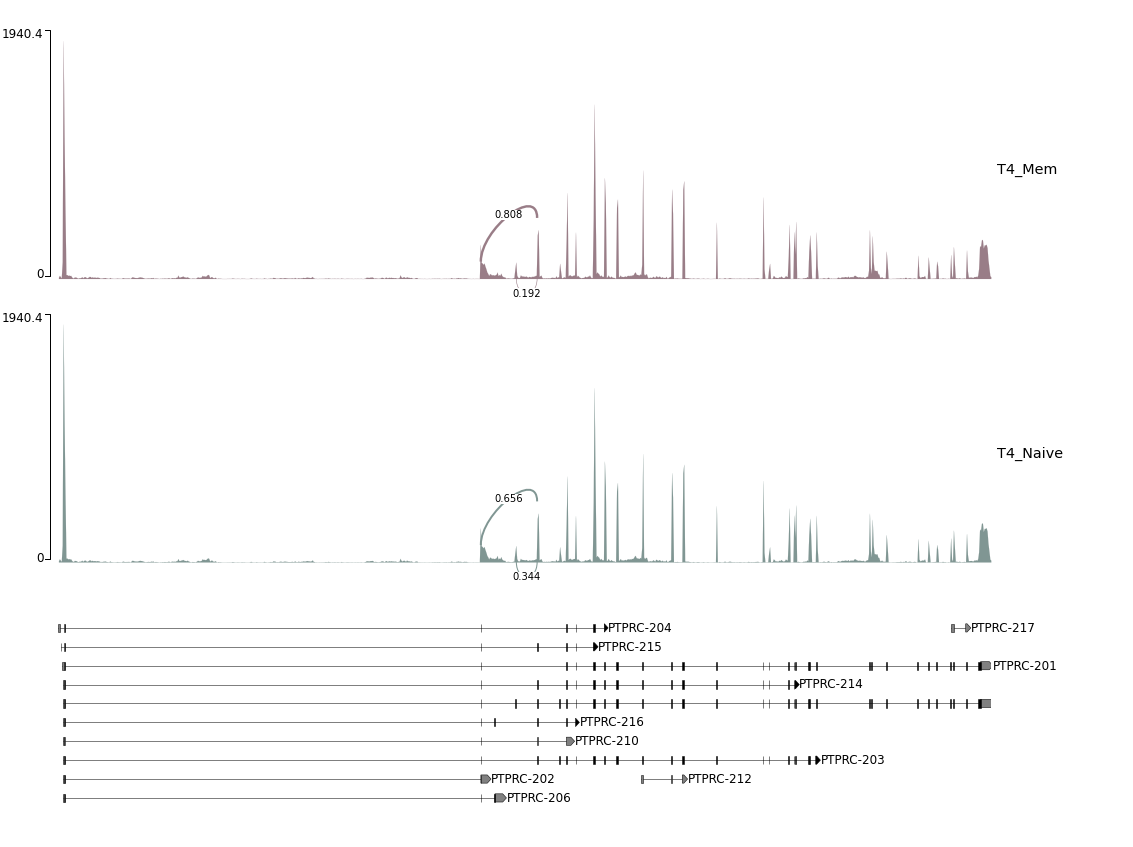

In [3]:
from IPython.display import Image
Image(filename='./sashimi_plots/sashimi_PTPRC.png',retina=False)

In [211]:
!conda list

# packages in environment at /c4/home/derek/miniconda3/envs/scquint:
#
# Name                    Version                   Build  Channel
_ipython_minor_entry_point 8.7.0                hb6b4a82_0    conda-forge
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
alsa-lib                  1.2.8                h166bdaf_0    conda-forge
anndata                   0.8.0              pyhd8ed1ab_1    conda-forge
anyio                     3.6.2              pyhd8ed1ab_0    conda-forge
appdirs                   1.4.4                    pypi_0    pypi
argcomplete               2.0.0                    pypi_0    pypi
argh                      0.26.2                   pypi_0    pypi
argon2-cffi               21.3.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h5764c6d_3    conda-forge
asciitree                 0.3.3                    pypi_0    pypi
asttokens    